# KNN-K近邻算法原理

本质上就是对「近朱者赤，近墨者黑」的一个数学描述。这个算法表达的是：一个样本该如何分类，看看它距离最近的K个样本是啥类别。

问题的关键在于：

- 如何度量距离
- 如何确定K值

分类步骤：

step1、计算测试样本和训练样本中每个样本的距离

step2、对距离排序

step3、找出距离最小的K个样本

step4、根据少数服从多数的原则，将测试样本归类到K个样本中占比最高的那一类



# KNN对手写数字进行识别分类

## 加载数据

In [3]:
# 加载数据 

from sklearn.datasets import load_digits

digits = load_digits()

data = digits.data

## 数据探索

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


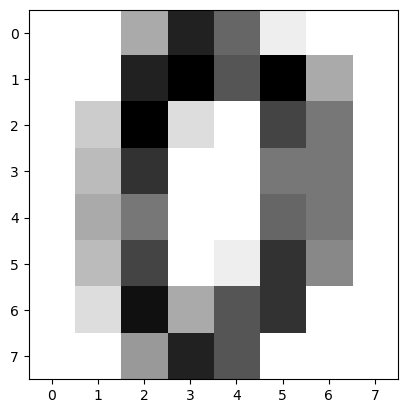

In [14]:
# 数据探索

print(data.shape)

# 查看第一张图

print(digits.images[0])

print(digits.target[0])

import matplotlib.pyplot as plt

plt.imshow(digits.images[0],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

## 划分测试集和训练集

In [15]:
# 划分训练集和测试集

from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(data,digits.target,test_size=0.25,random_state=33)


## 规范化

In [16]:
# 采用z-score规范化

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_z_x = ss.fit_transform(train_x)
test_z_x = ss.transform(test_x)

In [17]:
# 采用min-max规范化

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

train_mm_x = mms.fit_transform(train_x)
test_mm_x = mms.transform(test_x)


## 分类器结果对比

In [18]:
# 创建knn分类器
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()

knn.fit(train_z_x,train_y)

test_predict = knn.predict(test_z_x)

print("KNN准确率: ",accuracy_score(test_y,test_predict))


KNN准确率:  0.9755555555555555


In [19]:
# svm分类器

from sklearn.svm import SVC

svm = SVC()

svm.fit(train_z_x,train_y)

test_predict = svm.predict(test_z_x)

print("SVM准确率: ",accuracy_score(test_y,test_predict))


SVM准确率:  0.9866666666666667


In [21]:
# 朴素贝叶斯

from sklearn.naive_bayes import MultinomialNB

mb = MultinomialNB()

mb.fit(train_mm_x,train_y)

test_predict = mb.predict(test_mm_x)

print("朴素贝叶斯准确率: ",accuracy_score(test_y,test_predict))


朴素贝叶斯准确率:  0.8844444444444445


In [22]:
# 决策树

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
# 在做多项式朴素贝叶斯分类的时候，传入的数据不能有负数。
# 因为 Z-Score 会将数值规范化为一个标准的正态分布，即均值为 0，方差为 1，数值会包含负数。
# 因此我们需要采用 Min-Max 规范化，将数据规范化到[0,1]范围内

dt.fit(train_mm_x,train_y)

test_predict = dt.predict(test_mm_x)

print("决策树准确率: ",accuracy_score(test_y,test_predict))

决策树准确率:  0.8533333333333334
